# Breast Cancer Detection - CRISP-DM Project

## 1. Business Understanding

**Objective:** Predict malignant vs benign breast tumors from the provided dataset (data.csv).

**Success Criteria:** 
- High Recall for Malignant class (minimize false negatives)
- High ROC-AUC score

## 2. Data Understanding

In [1]:
# Importation de pandas pour la manipulation de données (DataFrames)
import pandas as pd

# Importation de numpy pour les calculs numériques et les tableaux
import numpy as np

# Importation de matplotlib.pyplot pour créer des graphiques
import matplotlib.pyplot as plt

# Importation de seaborn pour des visualisations statistiques plus avancées
import seaborn as sns

# Importation de train_test_split pour diviser les données en ensembles d'entraînement et de test
# Importation de StratifiedKFold pour la validation croisée stratifiée (maintient les proportions de classes)
# Importation de cross_val_score pour calculer les scores de validation croisée
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Importation de StandardScaler pour normaliser les features (moyenne=0, écart-type=1)
# Importation de LabelEncoder pour encoder les labels catégoriels en nombres
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importation de LogisticRegression pour la régression logistique (classification binaire)
from sklearn.linear_model import LogisticRegression
# Importation de SGDClassifier pour utiliser SGD avec contrôle du learning rate (comme dans le papier)
from sklearn.linear_model import SGDClassifier

# Importation de SVC pour les machines à vecteurs de support (Support Vector Classifier)
from sklearn.svm import SVC

# Importation de MLPClassifier pour les réseaux de neurones multicouches (Multi-Layer Perceptron)
from sklearn.neural_network import MLPClassifier

# Importation de KNeighborsClassifier pour la classification par k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier

# Importation des métriques d'évaluation:
# confusion_matrix: matrice de confusion pour voir les vrais/faux positifs/négatifs
# roc_auc_score: score AUC-ROC (aire sous la courbe ROC)
# roc_curve: courbe ROC (True Positive Rate vs False Positive Rate)
# accuracy_score: précision (pourcentage de prédictions correctes)
# recall_score: rappel (sensibilité, capacité à trouver tous les positifs)
# precision_score: précision (capacité à ne pas avoir de faux positifs)
# f1_score: score F1 (moyenne harmonique de précision et rappel)
# make_scorer: créer un scorer personnalisé pour la validation croisée
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, roc_curve, accuracy_score, 
    recall_score, precision_score, f1_score, make_scorer
)

# Importation de os pour les opérations sur les fichiers et dossiers
import os

# Importation de json pour sauvegarder les résultats au format JSON
import json

# Configuration du style de seaborn: 'whitegrid' = fond blanc avec grille
sns.set(style="whitegrid")

# Configuration de la résolution des graphiques: 100 dpi (dots per inch)
plt.rcParams['figure.dpi'] = 100

In [2]:
# Chargement du fichier CSV dans un DataFrame pandas
# 'data.csv' = nom du fichier à charger
df = pd.read_csv('data.csv')

# Affichage de la forme du dataset (nombre de lignes, nombre de colonnes)
# df.shape retourne un tuple (lignes, colonnes)
print('Dataset Shape:', df.shape)

# Affichage d'un message pour indiquer qu'on va montrer les 5 premières lignes
print('\nFirst 5 rows:')

# Affichage des 5 premières lignes du DataFrame
# df.head() retourne les 5 premières lignes par défaut
display(df.head())

# Affichage d'un message pour indiquer qu'on va montrer les informations du dataset
print('\nDataset Info:')

# Affichage des informations du dataset (types de données, valeurs manquantes, etc.)
# df.info() affiche un résumé du DataFrame
print(df.info())

# Affichage d'un message pour indiquer qu'on va compter les valeurs manquantes
print('\nMissing Values:')

# Calcul du nombre total de valeurs manquantes
# df.isna() retourne un DataFrame booléen (True si valeur manquante)
# .sum() compte les True par colonne
# .sum() à nouveau compte le total de toutes les colonnes
print(df.isna().sum().sum(), 'total missing values')

# Affichage d'un message pour indiquer qu'on va montrer la distribution de la variable cible
print('\nTarget Distribution:')

# Comptage des valeurs uniques dans la colonne 'diagnosis' (B=Bénin, M=Malin)
# value_counts() retourne le nombre d'occurrences de chaque valeur
print(df['diagnosis'].value_counts())

Dataset Shape: (569, 33)

First 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

In [3]:
# Affichage d'un résumé statistique du DataFrame
# describe() calcule des statistiques descriptives pour chaque colonne numérique:
# - count: nombre de valeurs non nulles
# - mean: moyenne
# - std: écart-type
# - min: valeur minimale
# - 25%, 50%, 75%: quartiles (médiane = 50%)
# - max: valeur maximale
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 2.1 Dataset Overview

In [4]:
# Vérification des valeurs manquantes dans le dataset
# df.isnull() retourne un DataFrame booléen (True si valeur manquante, False sinon)
# .sum() compte les True par colonne (nombre de valeurs manquantes par colonne)
# .sum() à nouveau compte le total de toutes les colonnes (nombre total de valeurs manquantes)
# f"..." = f-string pour formater la chaîne avec la valeur calculée
print(f"Total missing values: {df.isnull().sum().sum()}")

Total missing values: 569


In [5]:
# Affichage d'un résumé statistique du DataFrame (identique à la cellule précédente)
# describe() calcule des statistiques descriptives pour chaque colonne numérique
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 2.2 Feature Structure Analysis

The dataset contains **30 features** derived from **10 base measurements**, each with **3 statistical aggregations**:

- **Mean (_mean):** Average value across all cells in the image
- **Standard Error (_se):** Standard error of the mean (measurement variability)
- **Worst (_worst):** Largest (worst) value found among all cells

**Base Features (10):** radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal_dimension

**Why these statistics matter:**
- **Mean:** Captures typical/representative cell characteristics
- **SE:** Indicates consistency/variability (high SE = more heterogeneous tumor)
- **Worst:** Captures the most extreme/malignant characteristics (often most predictive)

> **Note:** We don't have raw pixel-level data - these are already aggregated statistics from image analysis.

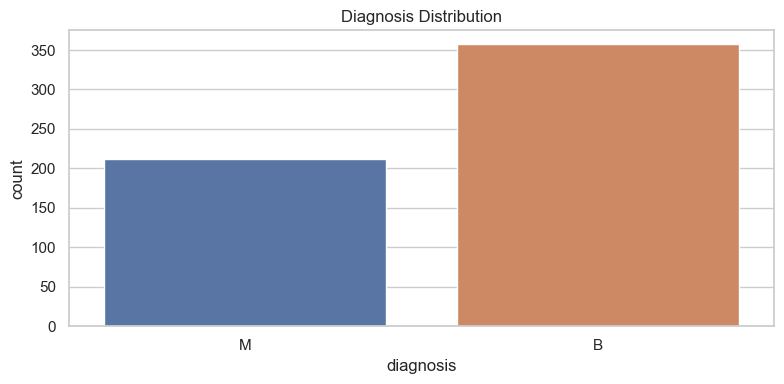

Class distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [6]:
# Création du dossier 'results/plots' pour sauvegarder les graphiques
# 'results/plots' = chemin du dossier à créer
# exist_ok=True signifie qu'on ne génère pas d'erreur si le dossier existe déjà
os.makedirs('results/plots', exist_ok=True)

# Création d'une nouvelle figure pour le graphique
# figsize=(8, 4) = taille de la figure en pouces (largeur=8, hauteur=4)
plt.figure(figsize=(8, 4))

# Comptage des valeurs uniques dans la colonne 'diagnosis'
# value_counts() retourne le nombre d'occurrences de chaque valeur (B=Bénin, M=Malin)
diagnosis_counts = df['diagnosis'].value_counts()

# Création d'un graphique en barres pour visualiser la distribution des classes
# x='diagnosis' = colonne à utiliser pour l'axe X
# data=df = DataFrame contenant les données
# hue='diagnosis' = utilise la même colonne pour la couleur (pour différencier les barres)
# legend=False = n'affiche pas la légende (pas nécessaire ici)
sns.countplot(x='diagnosis', data=df, hue='diagnosis', legend=False)

# Ajout d'un titre au graphique
# 'Diagnosis Distribution' = texte du titre
plt.title('Diagnosis Distribution')

# Ajustement automatique de l'espacement pour éviter que les labels soient coupés
plt.tight_layout()

# Sauvegarde du graphique dans un fichier PNG
# 'results/plots/class_distribution.png' = chemin et nom du fichier
# dpi=150 = résolution (dots per inch - points par pouce)
# bbox_inches='tight' = ajuste les marges pour inclure tous les éléments
plt.savefig('results/plots/class_distribution.png', dpi=150, bbox_inches='tight')

# Affichage du graphique
plt.show()

# Affichage d'un message pour indiquer qu'on va montrer la distribution
print("Class distribution:")

# Affichage du comptage des classes
print(diagnosis_counts)

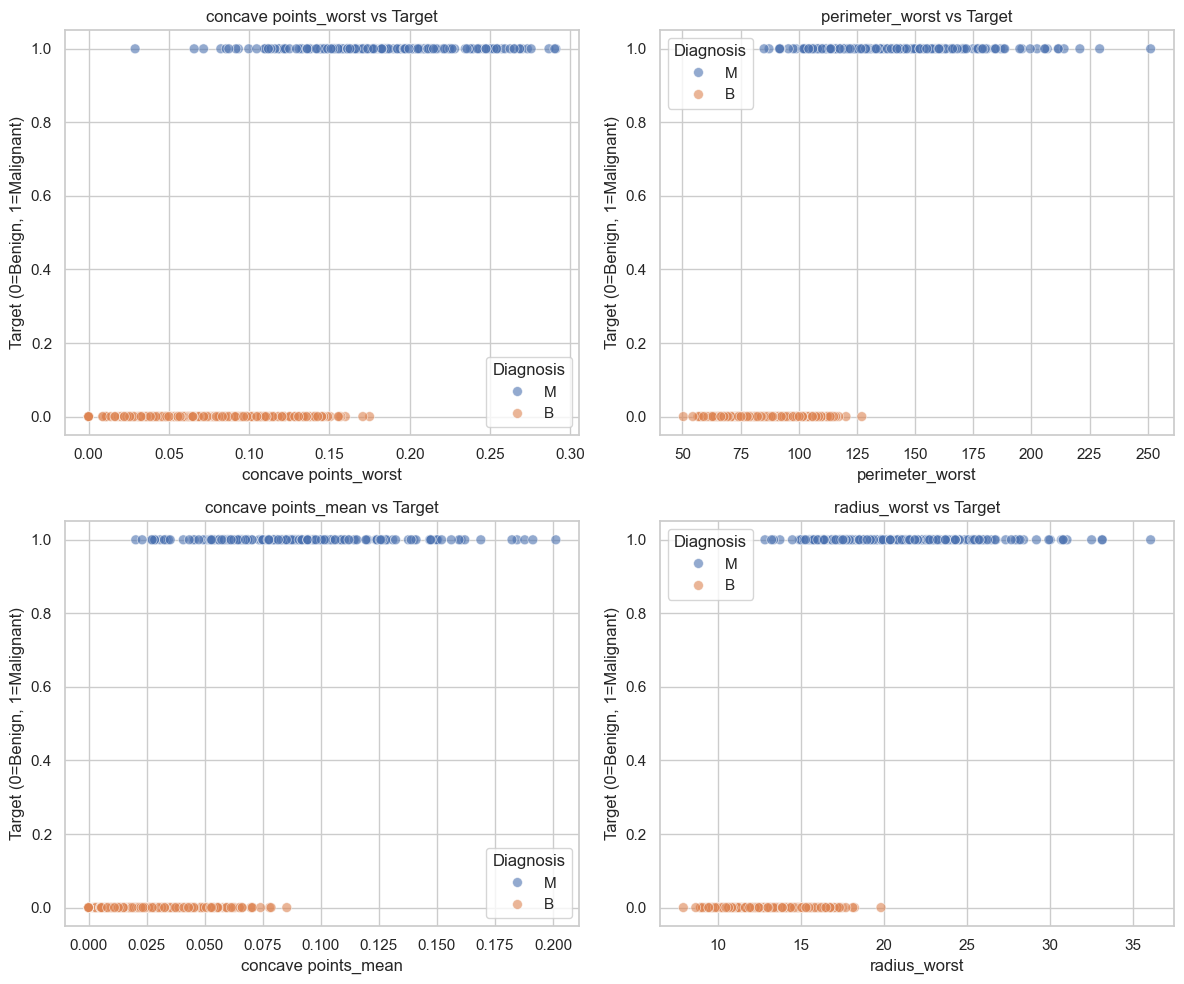

Features sélectionnées pour les scatter plots: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst']


In [7]:
# ===== SCATTER PLOTS DES FEATURES (comme dans le papier de recherche) =====
# Ce graphique montre la distribution des features les plus importantes
# Selon le papier, les scatter plots permettent de visualiser la séparabilité des classes

# Sélection des features les plus corrélées avec la variable cible pour les scatter plots
# On va utiliser les features avec la plus forte corrélation avec 'diagnosis'
# Création d'une copie du DataFrame pour ne pas modifier l'original
scatter_df = df.copy()

# Encodage de la variable cible pour le calcul de corrélation
# map({'M': 1, 'B': 0}) transforme M (Malin) en 1 et B (Bénin) en 0
scatter_df['target'] = scatter_df['diagnosis'].map({'M': 1, 'B': 0})

# Calcul de la corrélation de chaque feature avec la variable cible
# corr() calcule les coefficients de corrélation
# ['target'] sélectionne uniquement la corrélation avec la variable cible
# abs() prend la valeur absolue (on veut les corrélations fortes, positives ou négatives)
# sort_values(ascending=False) trie par ordre décroissant (les plus corrélées en premier)
# head(6) prend les 6 premières (les 6 features les plus corrélées)
top_features = scatter_df.select_dtypes(include=[np.number]).corr()['target'].abs().sort_values(ascending=False).head(6).index.tolist()

# Suppression de 'target' de la liste (on ne veut pas scatter plot de target avec target)
if 'target' in top_features:
    top_features.remove('target')

# Sélection des 4 premières features pour créer une grille de scatter plots 2x2
# [:4] prend les 4 premières features
selected_features = top_features[:4]

# Création d'une figure avec une grille de sous-graphiques 2x2
# figsize=(12, 10) = taille de la figure en pouces (largeur=12, hauteur=10)
# subplots(2, 2) crée une grille de 2 lignes et 2 colonnes (4 graphiques au total)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Aplatissement de la grille d'axes en une liste 1D pour faciliter l'itération
# .flatten() transforme la matrice 2x2 en une liste de 4 éléments
axes = axes.flatten()

# Parcours de chaque feature sélectionnée pour créer un scatter plot
# enumerate(selected_features) retourne (index, nom_de_la_feature)
for idx, feature in enumerate(selected_features):
    # Sélection de l'axe correspondant pour ce scatter plot
    # axes[idx] = l'axe à la position idx dans la liste aplatie
    ax = axes[idx]
    
    # Création d'un scatter plot pour cette feature
    # x=feature = colonne à utiliser pour l'axe X (la feature)
    # y='target' = colonne à utiliser pour l'axe Y (la variable cible encodée)
    # hue='diagnosis' = utilise la colonne 'diagnosis' pour colorer les points (M=Malin, B=Bénin)
    # data=scatter_df = DataFrame contenant les données
    # ax=ax = spécifie l'axe sur lequel tracer (dans notre grille)
    # alpha=0.6 = transparence des points (0.6 = 60% d'opacité, pour voir les superpositions)
    # s=50 = taille des points (50 pixels)
    sns.scatterplot(x=feature, y='target', hue='diagnosis', data=scatter_df, ax=ax, alpha=0.6, s=50)
    
    # Ajout d'un titre pour ce sous-graphique
    # feature = nom de la feature (sera utilisé comme titre)
    ax.set_title(f'{feature} vs Target')
    
    # Ajout d'un label pour l'axe X
    # feature = nom de la feature (sera utilisé comme label)
    ax.set_xlabel(feature)
    
    # Ajout d'un label pour l'axe Y
    # 'Target (0=Benign, 1=Malignant)' = texte du label
    ax.set_ylabel('Target (0=Benign, 1=Malignant)')
    
    # Affichage de la légende pour ce sous-graphique
    # ax.legend() affiche la légende avec les couleurs pour M et B
    ax.legend(title='Diagnosis')

# Ajustement automatique de l'espacement entre les sous-graphiques
# tight_layout() ajuste les espacements pour éviter que les labels se chevauchent
plt.tight_layout()

# Sauvegarde du graphique dans un fichier PNG
# 'results/plots/feature_scatter_plots.png' = chemin et nom du fichier
# dpi=150 = résolution (dots per inch)
# bbox_inches='tight' = ajuste les marges pour inclure tous les éléments
plt.savefig('results/plots/feature_scatter_plots.png', dpi=150, bbox_inches='tight')

# Affichage du graphique
plt.show()

# Affichage d'un message pour indiquer quelles features ont été sélectionnées
print(f"Features sélectionnées pour les scatter plots: {selected_features}")



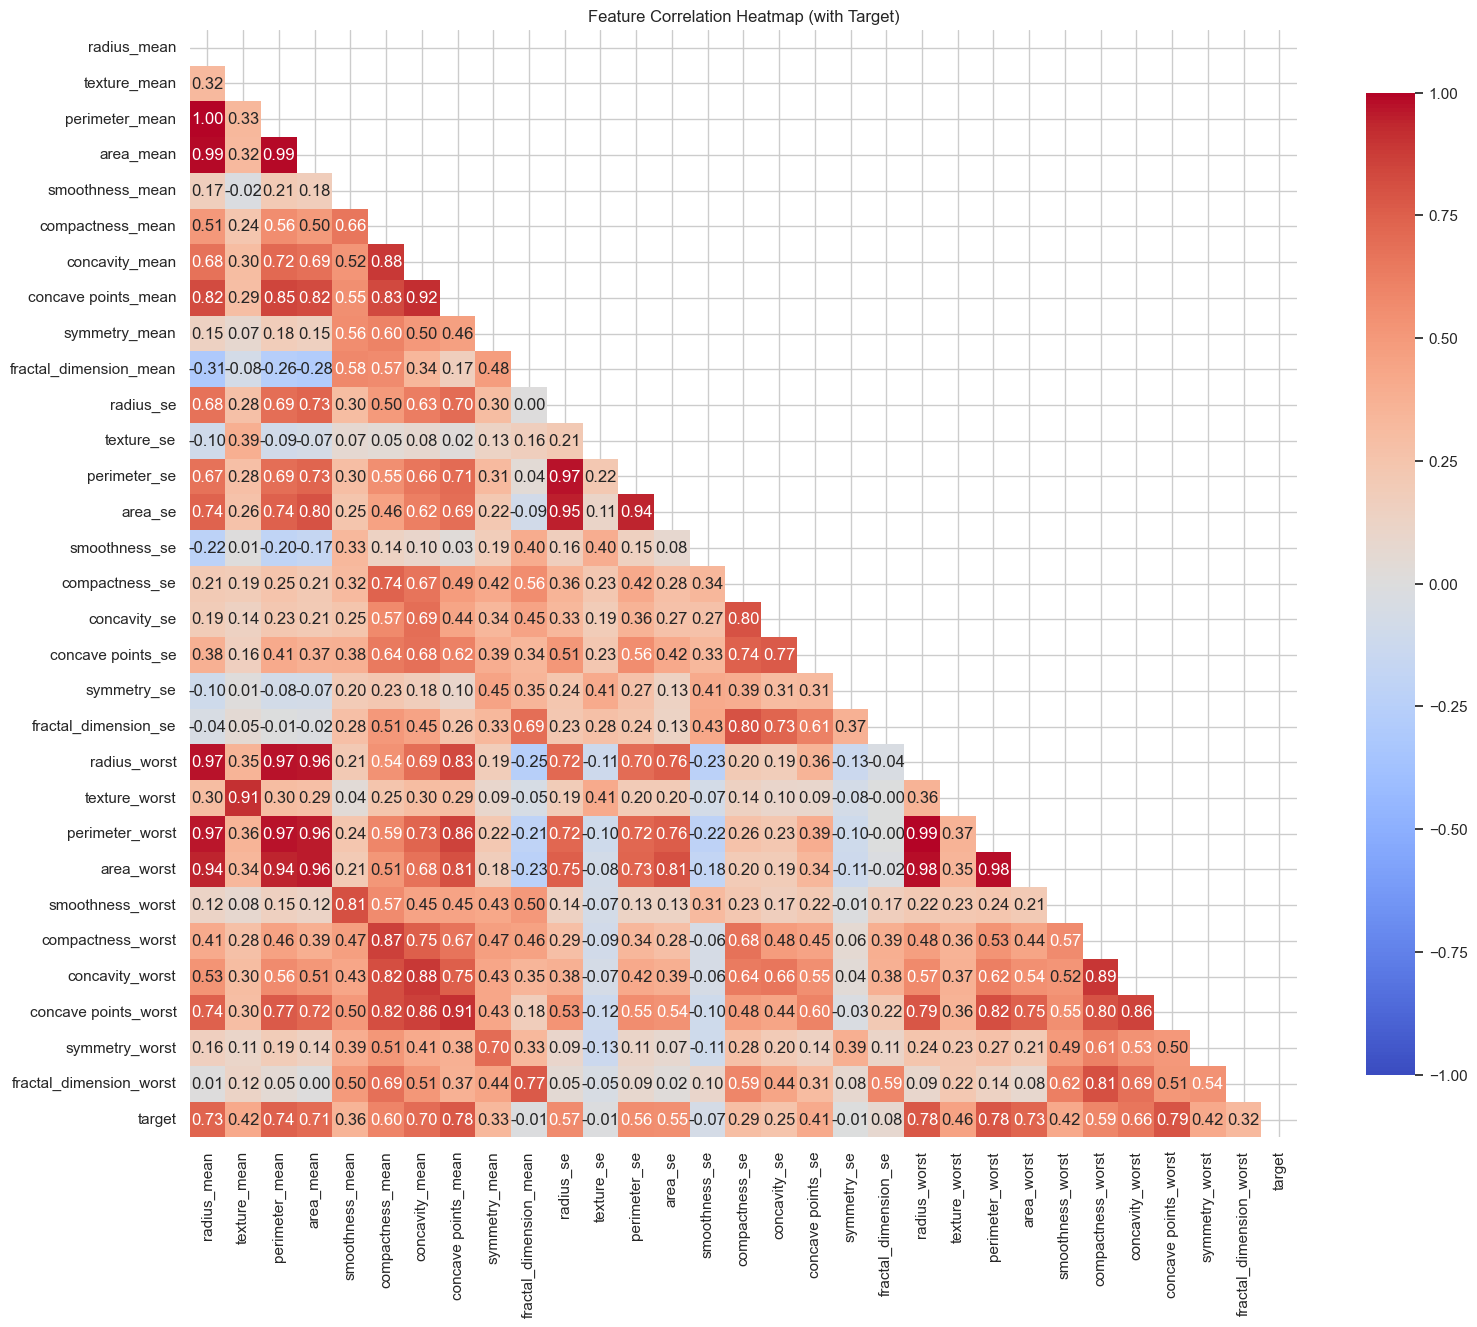

In [8]:
# Création d'une copie du DataFrame pour ne pas modifier l'original
# copy() crée une copie indépendante du DataFrame
corr_df = df.copy()

# Création d'une colonne 'target' encodée numériquement
# map({'M': 1, 'B': 0}) transforme M (Malin) en 1 et B (Bénin) en 0
corr_df['target'] = corr_df['diagnosis'].map({'M': 1, 'B': 0})

# Sélection uniquement des colonnes numériques
# select_dtypes(include=[np.number]) sélectionne uniquement les colonnes de type numérique
# drop(['id','Unnamed: 32'], axis=1, errors='ignore') supprime les colonnes inutiles si elles existent
# axis=1 signifie qu'on supprime des colonnes
# errors='ignore' signifie qu'on ignore les erreurs si une colonne n'existe pas
numeric_df = corr_df.select_dtypes(include=[np.number]).drop(['id','Unnamed: 32'], axis=1, errors='ignore')

# Calcul de la matrice de corrélation
# corr() calcule les coefficients de corrélation de Pearson entre toutes les paires de colonnes
corr_matrix = numeric_df.corr()

# Création d'un masque pour n'afficher que la partie triangulaire inférieure
# np.ones_like(corr_matrix, dtype=bool) crée une matrice de True de la même taille
# np.triu() retourne la partie triangulaire supérieure (True au-dessus de la diagonale)
# Le masque cache la partie supérieure pour éviter la redondance (corrélation A-B = corrélation B-A)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Création d'une nouvelle figure pour le graphique
# figsize=(16, 14) = taille de la figure en pouces (largeur=16, hauteur=14)
plt.figure(figsize=(16, 14))

# Création d'une heatmap (carte de chaleur) pour visualiser les corrélations
# corr_matrix = matrice de corrélation à afficher
# mask=mask = masque pour cacher la partie triangulaire supérieure
# annot=True = affiche les valeurs numériques dans chaque cellule
# fmt='.2f' = format des nombres (2 décimales)
# cmap='coolwarm' = palette de couleurs (bleu=froid/négatif, rouge=chaud/positif)
# center=0 = centre la palette de couleurs à 0 (corrélation nulle)
# square=True = fait des cellules carrées
# vmin=-1, vmax=1 = limites de l'échelle de couleurs (-1 à 1 pour les corrélations)
# cbar_kws={"shrink": 0.8} = réduit la barre de couleur à 80% de sa taille
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})

# Ajout d'un titre au graphique
# 'Feature Correlation Heatmap (with Target)' = texte du titre
plt.title('Feature Correlation Heatmap (with Target)')

# Ajustement automatique de l'espacement pour éviter que les labels soient coupés
plt.tight_layout()

# Sauvegarde du graphique dans un fichier PNG
# 'results/plots/correlation_heatmap.png' = chemin et nom du fichier
# dpi=150 = résolution (dots per inch)
# bbox_inches='tight' = ajuste les marges pour inclure tous les éléments
plt.savefig('results/plots/correlation_heatmap.png', dpi=150, bbox_inches='tight')

# Affichage du graphique
plt.show()

## 3. Data Preparation

### 3.1 Data Cleaning and Preprocessing

In [9]:
# Suppression des colonnes inutiles du DataFrame
# ['id', 'Unnamed: 32'] = liste des colonnes à supprimer
# axis=1 signifie qu'on supprime des colonnes (axis=0 serait pour les lignes)
# errors='ignore' signifie qu'on ignore les erreurs si une colonne n'existe pas
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# Création d'un objet LabelEncoder pour encoder les labels catégoriels
# LabelEncoder transforme les labels textuels (M, B) en nombres (0, 1)
le = LabelEncoder()

# Encodage de la colonne 'diagnosis' (M=Malin devient 1, B=Bénin devient 0)
# fit_transform() apprend le mapping et applique la transformation en une seule étape
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Séparation des features (X) et de la variable cible (y)
# X contient toutes les colonnes sauf 'diagnosis' (les features)
# axis=1 signifie qu'on supprime une colonne
X = df.drop('diagnosis', axis=1)

# y contient uniquement la colonne 'diagnosis' (la variable cible à prédire)
y = df['diagnosis']

# Division des données selon le papier de recherche: 70% train / 30% test
# X, y = les données à diviser
# test_size=0.3 signifie 30% pour le test, donc 70% pour l'entraînement (comme dans le papier)
# random_state=42 garantit la reproductibilité (même division à chaque exécution)
# stratify=y maintient les proportions de classes dans chaque ensemble
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Création d'un objet StandardScaler pour normaliser les features
# StandardScaler transforme les données pour avoir moyenne=0 et écart-type=1
# Cette normalisation correspond à l'équation (1) du papier: (X - μ) / σ
scaler = StandardScaler()

# Normalisation de l'ensemble d'entraînement
# fit_transform() calcule la moyenne (μ) et l'écart-type (σ), puis normalise les données
X_train_scaled = scaler.fit_transform(X_train)

# Normalisation de l'ensemble de test
# transform() utilise les paramètres (μ et σ) calculés sur l'ensemble d'entraînement (pas de fit!)
# Important: on utilise les mêmes paramètres que pour l'entraînement pour éviter le data leakage
X_test_scaled = scaler.transform(X_test)

# Création du dossier 'data_processed' s'il n'existe pas
# 'data_processed' = nom du dossier à créer
# exist_ok=True signifie qu'on ne génère pas d'erreur si le dossier existe déjà
os.makedirs('data_processed', exist_ok=True)

# Sauvegarde du DataFrame nettoyé dans un fichier CSV
# 'data_processed/data_clean.csv' = chemin et nom du fichier
# index=False signifie qu'on ne sauvegarde pas l'index des lignes
df.to_csv('data_processed/data_clean.csv', index=False)

# Affichage du nombre d'échantillons dans chaque ensemble
# .shape[0] retourne le nombre de lignes (échantillons)
print(f"Training set: {X_train_scaled.shape[0]} samples (70%)")
print(f"Test set: {X_test_scaled.shape[0]} samples (30%)")


Training set: 398 samples (70%)
Test set: 171 samples (30%)


## 4. Modeling

We'll train and evaluate multiple models following the research paper:
- Logistic Regression (binary classification)
- Softmax Regression (multinomial logistic regression)
- Multi-Layer Perceptron (MLP)
- Support Vector Machine (SVM)
- K-Nearest Neighbors with L1 and L2 distances


### 4.1 Logistic Regression

In [10]:
# Création du dossier 'results' pour sauvegarder les résultats
# 'results' = nom du dossier à créer
# exist_ok=True signifie qu'on ne génère pas d'erreur si le dossier existe déjà
os.makedirs('results', exist_ok=True)

# Affichage d'un message pour indiquer le début de l'entraînement
print("Training Logistic Regression (Linear Regression from paper)...")

# Création d'un modèle de régression logistique (correspond à Linear Regression dans le papier)
# Utilisation de SGDClassifier avec loss='log' pour avoir le contrôle sur le learning rate (comme dans le papier)
# loss='log' = utilise la fonction de perte logistique (équivalent à Logistic Regression)
# learning_rate='constant' = taux d'apprentissage constant
# eta0=1e-3 = taux d'apprentissage initial de 0.001 (comme dans le papier, Table 1: learning_rate=1e-3)
# max_iter=3000 = nombre maximum d'itérations pour la convergence (comme dans le papier, Table 1)
# random_state=42 garantit la reproductibilité
lr_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=1e-3, max_iter=3000, random_state=42)

# Entraînement du modèle sur les données d'entraînement normalisées
# fit() apprend les paramètres du modèle à partir des données
# Selon le papier, le modèle est entraîné sur 70% des données (training phase)
lr_model.fit(X_train_scaled, y_train)

# Prédiction des probabilités sur l'ensemble de test (30% des données selon le papier)
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
lr_y_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Prédiction des classes sur l'ensemble de test
# predict() retourne les classes prédites (0 ou 1)
lr_y_test_pred = lr_model.predict(X_test_scaled)

# Création d'un dictionnaire pour stocker tous les résultats
# Selon le papier, on évalue seulement sur l'ensemble de test (pas de validation croisée)
lr_results = {
    # Score Accuracy sur l'ensemble de test (Test Accuracy dans le papier, Table 2)
    # accuracy_score() compare les prédictions aux vraies valeurs
    'Test_Accuracy': float(accuracy_score(y_test, lr_y_test_pred)),
    # Score ROC-AUC sur l'ensemble de test
    # roc_auc_score() calcule l'aire sous la courbe ROC
    'Test_ROC_AUC': float(roc_auc_score(y_test, lr_y_test_proba)),
    # Score Recall (Sensitivity/TPR dans le papier) sur l'ensemble de test
    # recall_score() calcule le rappel (sensibilité)
    # pos_label=1 signifie que la classe positive est 1 (malin)
    'Test_Recall': float(recall_score(y_test, lr_y_test_pred, pos_label=1)),
    # Score Precision sur l'ensemble de test
    # precision_score() calcule la précision
    'Test_Precision': float(precision_score(y_test, lr_y_test_pred, pos_label=1)),
    # Score F1 sur l'ensemble de test
    # f1_score() calcule la moyenne harmonique de précision et rappel
    'Test_F1': float(f1_score(y_test, lr_y_test_pred, pos_label=1))
}

# Ouverture du fichier JSON en mode écriture pour sauvegarder les résultats
# 'results/logistic_regression_results.json' = chemin et nom du fichier
# 'w' = mode écriture (write)
with open('results/logistic_regression_results.json', 'w') as f:
    # Écriture des résultats au format JSON dans le fichier
    # json.dump() écrit le dictionnaire dans le fichier
    # indent=2 ajoute une indentation de 2 espaces pour rendre le JSON lisible
    json.dump({
        # Nom du modèle (Linear Regression dans le papier)
        'model_name': 'Logistic Regression (Linear Regression)',
        # Résultats sur l'ensemble de test (selon le papier, Table 2)
        'test_set': {
            'accuracy': lr_results['Test_Accuracy'],
            'roc_auc': lr_results['Test_ROC_AUC'],
            'recall': lr_results['Test_Recall'],
            'precision': lr_results['Test_Precision'],
            'f1_score': lr_results['Test_F1']
        }
    }, f, indent=2)

# Affichage des résultats principaux
print("Logistic Regression (Linear Regression) Results:")
# Affichage du score Accuracy sur l'ensemble de test (Test Accuracy dans le papier, Table 2)
# :.4f formate le nombre avec 4 décimales
print(f"  Test Accuracy: {lr_results['Test_Accuracy']:.4f}")
# Affichage du score ROC-AUC sur l'ensemble de test
print(f"  Test ROC-AUC: {lr_results['Test_ROC_AUC']:.4f}")
# Affichage du score Recall (Sensitivity/TPR) sur l'ensemble de test
print(f"  Test Recall (Sensitivity): {lr_results['Test_Recall']:.4f}")


Training Logistic Regression (Linear Regression from paper)...
Logistic Regression (Linear Regression) Results:
  Test Accuracy: 0.9883
  Test ROC-AUC: 0.9990
  Test Recall (Sensitivity): 0.9688


### 4.2 Softmax Regression

In [11]:
# Affichage d'un message pour indiquer le début de l'entraînement
print("Training Softmax Regression...")

# Création d'un modèle de régression Softmax (régression logistique multinomiale)
# loss='log_loss' = utilise la fonction de perte logistique (équivalent à Softmax Regression)
# Utilisation de SGDClassifier avec loss='log_loss' pour avoir le contrôle sur le learning rate (comme dans le papier)
# learning_rate='constant' = taux d'apprentissage constant
# eta0=1e-3 = taux d'apprentissage initial de 0.001 (comme dans le papier, Table 1: learning_rate=1e-3)
# max_iter=3000 = nombre maximum d'itérations pour la convergence (comme dans le papier, Table 1)
# random_state=42 garantit la reproductibilité
softmax_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=1e-3, max_iter=3000, random_state=42)

# Entraînement du modèle sur les données d'entraînement normalisées et équilibrées
# fit() apprend les paramètres du modèle à partir des données
softmax_model.fit(X_train_scaled, y_train)

# Prédiction des probabilités sur l'ensemble de validation
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
softmax_y_test_proba = softmax_model.predict_proba(X_test_scaled)[:, 1]

# Prédiction des classes sur l'ensemble de validation
# predict() retourne les classes prédites (0 ou 1)
softmax_y_test_pred = softmax_model.predict(X_test_scaled)

# Création d'un dictionnaire pour stocker tous les résultats
softmax_results = {
        # Score Accuracy sur l'ensemble de validation
    # accuracy_score() compare les prédictions aux vraies valeurs
    'Test_Accuracy': float(accuracy_score(y_test, softmax_y_test_pred)),
    # Score ROC-AUC sur l'ensemble de validation
    # roc_auc_score() calcule l'aire sous la courbe ROC
    'Test_ROC_AUC': float(roc_auc_score(y_test, softmax_y_test_proba)),
    # Score Recall sur l'ensemble de validation
    # recall_score() calcule le rappel (sensibilité)
    # pos_label=1 signifie que la classe positive est 1 (malin)
    'Test_Recall': float(recall_score(y_test, softmax_y_test_pred, pos_label=1)),
    # Score Precision sur l'ensemble de validation
    # precision_score() calcule la précision
    'Test_Precision': float(precision_score(y_test, softmax_y_test_pred, pos_label=1)),
    # Score F1 sur l'ensemble de validation
    # f1_score() calcule la moyenne harmonique de précision et rappel
    'Test_F1': float(f1_score(y_test, softmax_y_test_pred, pos_label=1))
}

# Ouverture du fichier JSON en mode écriture pour sauvegarder les résultats
# 'results/softmax_regression_results.json' = chemin et nom du fichier
# 'w' = mode écriture (write)
with open('results/softmax_regression_results.json', 'w') as f:
    # Écriture des résultats au format JSON dans le fichier
    # json.dump() écrit le dictionnaire dans le fichier
    # indent=2 ajoute une indentation de 2 espaces pour rendre le JSON lisible
    json.dump({
        # Nom du modèle
        'model_name': 'Softmax Regression',
        # Résultats sur l'ensemble de test (selon le papier, Table 2)
        'test_set': {
            'accuracy': softmax_results['Test_Accuracy'],
            'roc_auc': softmax_results['Test_ROC_AUC'],
            'recall': softmax_results['Test_Recall'],
            'precision': softmax_results['Test_Precision'],
            'f1_score': softmax_results['Test_F1']
        }
    }, f, indent=2)

# Affichage des résultats principaux
print("Softmax Regression Results:")
# Affichage du score Accuracy sur l'ensemble de test (Test Accuracy dans le papier, Table 2)
# :.4f formate le nombre avec 4 décimales
print(f"  Test Accuracy: {softmax_results['Test_Accuracy']:.4f}")
# Affichage du score ROC-AUC sur l'ensemble de test
print(f"  Test ROC-AUC: {softmax_results['Test_ROC_AUC']:.4f}")
# Affichage du score Recall (Sensitivity/TPR) sur l'ensemble de test
print(f"  Test Recall (Sensitivity): {softmax_results['Test_Recall']:.4f}")


Training Softmax Regression...
Softmax Regression Results:
  Test Accuracy: 0.9883
  Test ROC-AUC: 0.9990
  Test Recall (Sensitivity): 0.9688


### 4.3 Multi-Layer Perceptron (MLP)

In [12]:
# Affichage d'un message pour indiquer le début de l'entraînement
print("Training MLP...")

# Création d'un modèle MLP (Multi-Layer Perceptron - réseau de neurones multicouches)
# hidden_layer_sizes=(500, 500, 500) = architecture du réseau: première couche cachée avec 100 neurones, deuxième avec 50 neurones
# learning_rate_init=1e-2 = taux d'apprentissage initial (vitesse d'apprentissage)
# alpha=0.01 = paramètre de régularisation L2 (pénalise les poids élevés pour éviter le sur-apprentissage)
# max_iter=3000 = nombre maximum d'itérations (époques) pour l'entraînement
# early_stopping=False = arrêt anticipé si la performance ne s'améliore plus sur l'ensemble de validation
# random_state=42 garantit la reproductibilité
# verbose=0 = pas de messages pendant l'entraînement (0=silencieux, 1=progressif)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(500, 500, 500),
    learning_rate_init=1e-2,
    alpha=0.01,
    max_iter=3000,
    early_stopping=False,
    random_state=42,
    verbose=0,
    # validation_fraction=0.1 = utilise 10% des données d'entraînement pour la validation
    # Cela permet de stocker l'historique de validation (validation_scores_)
    # Note: selon le papier, on utilise 70/30 train/test, donc on peut utiliser une petite fraction pour la validation
    validation_fraction=0.1
)

# Entraînement du modèle sur les données d'entraînement normalisées et équilibrées
# fit() apprend les paramètres du modèle (poids des connexions) à partir des données
mlp_model.fit(X_train_scaled, y_train)

# Prédiction des probabilités sur l'ensemble de validation
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
mlp_y_test_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Prédiction des classes sur l'ensemble de validation
# predict() retourne les classes prédites (0 ou 1)
mlp_y_test_pred = mlp_model.predict(X_test_scaled)

# Création d'un dictionnaire pour stocker tous les résultats
mlp_results = {
        # Score Accuracy sur l'ensemble de validation
    # accuracy_score() compare les prédictions aux vraies valeurs
    'Test_Accuracy': float(accuracy_score(y_test, mlp_y_test_pred)),
    # Score ROC-AUC sur l'ensemble de validation
    # roc_auc_score() calcule l'aire sous la courbe ROC
    'Test_ROC_AUC': float(roc_auc_score(y_test, mlp_y_test_proba)),
    # Score Recall sur l'ensemble de validation
    # recall_score() calcule le rappel (sensibilité)
    # pos_label=1 signifie que la classe positive est 1 (malin)
    'Test_Recall': float(recall_score(y_test, mlp_y_test_pred, pos_label=1)),
    # Score Precision sur l'ensemble de validation
    # precision_score() calcule la précision
    'Test_Precision': float(precision_score(y_test, mlp_y_test_pred, pos_label=1)),
    # Score F1 sur l'ensemble de validation
    # f1_score() calcule la moyenne harmonique de précision et rappel
    'Test_F1': float(f1_score(y_test, mlp_y_test_pred, pos_label=1))
}

# Ouverture du fichier JSON en mode écriture pour sauvegarder les résultats
# 'results/mlp_results.json' = chemin et nom du fichier
# 'w' = mode écriture (write)
with open('results/mlp_results.json', 'w') as f:
    # Écriture des résultats au format JSON dans le fichier
    # json.dump() écrit le dictionnaire dans le fichier
    # indent=2 ajoute une indentation de 2 espaces pour rendre le JSON lisible
    json.dump({
        # Nom du modèle
        'model_name': 'MLP',
        # Résultats sur l'ensemble de test (selon le papier, Table 2)
        'test_set': {
            'accuracy': mlp_results['Test_Accuracy'],
            'roc_auc': mlp_results['Test_ROC_AUC'],
            'recall': mlp_results['Test_Recall'],
            'precision': mlp_results['Test_Precision'],
            'f1_score': mlp_results['Test_F1']
        }
    }, f, indent=2)

# Affichage des résultats principaux
print("MLP Results:")
# Affichage du score Accuracy sur l'ensemble de test (Test Accuracy dans le papier, Table 2)
# :.4f formate le nombre avec 4 décimales
print(f"  Test Accuracy: {mlp_results['Test_Accuracy']:.4f}")
# Affichage du score ROC-AUC sur l'ensemble de test
print(f"  Test ROC-AUC: {mlp_results['Test_ROC_AUC']:.4f}")
# Affichage du score Recall (Sensitivity/TPR) sur l'ensemble de test
print(f"  Test Recall (Sensitivity): {mlp_results['Test_Recall']:.4f}")


Training MLP...
MLP Results:
  Test Accuracy: 0.9708
  Test ROC-AUC: 0.9784
  Test Recall (Sensitivity): 0.9375


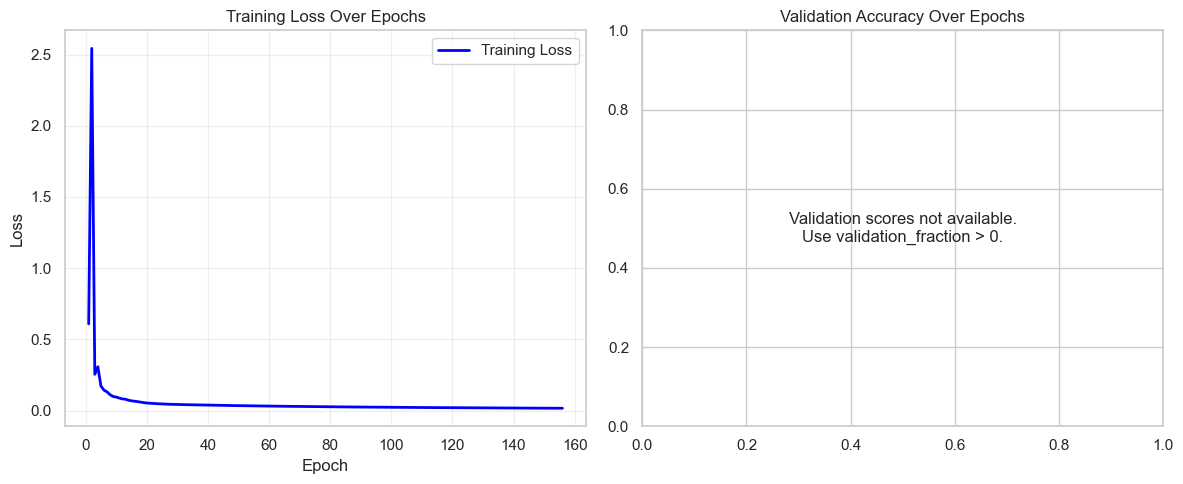

Graphiques de training loss et validation accuracy affichés.


In [13]:
# ===== GRAPHIQUE DE TRAINING ACCURACY OVER EPOCHS POUR MLP =====
# Ce graphique montre l'évolution de l'accuracy sur l'ensemble d'entraînement pendant l'entraînement
# Selon le papier de recherche, ce graphique permet de visualiser la convergence du modèle

# Vérification si le modèle MLP a un historique d'entraînement (loss_curve_)
# loss_curve_ contient l'historique de la perte (loss) à chaque itération
# Si le modèle a été entraîné avec validation_fraction > 0, on peut aussi avoir validation_scores_
if hasattr(mlp_model, 'loss_curve_'):
    # Création d'une nouvelle figure pour le graphique
    # figsize=(12, 5) = taille de la figure en pouces (largeur=12, hauteur=5)
    # On va créer deux sous-graphiques côte à côte: un pour la loss, un pour l'accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Calcul du nombre d'époques
    # len(mlp_model.loss_curve_) = nombre d'itérations effectuées
    epochs = range(1, len(mlp_model.loss_curve_) + 1)
    
    # ===== GRAPHIQUE 1: TRAINING LOSS =====
    # Tracé de la courbe de perte (loss) sur l'ensemble d'entraînement
    # ax1.plot() trace une ligne sur le premier sous-graphique
    # epochs = valeurs pour l'axe X (numéro de l'époque)
    # mlp_model.loss_curve_ = valeurs pour l'axe Y (perte à chaque époque)
    # label='Training Loss' = étiquette pour la légende
    # linewidth=2 = épaisseur de la ligne (2 pixels)
    # color='blue' = couleur de la ligne (bleu)
    ax1.plot(epochs, mlp_model.loss_curve_, label='Training Loss', linewidth=2, color='blue')
    
    # Ajout d'un label pour l'axe X du premier graphique
    # 'Epoch' = texte du label (numéro de l'époque/itération)
    ax1.set_xlabel('Epoch')
    
    # Ajout d'un label pour l'axe Y du premier graphique
    # 'Loss' = texte du label (valeur de la fonction de perte)
    ax1.set_ylabel('Loss')
    
    # Ajout d'un titre pour le premier graphique
    # 'Training Loss' = texte du titre
    ax1.set_title('Training Loss Over Epochs')
    
    # Affichage de la légende pour le premier graphique
    ax1.legend()
    
    # Ajout d'une grille au premier graphique
    # grid(True) active la grille
    # alpha=0.3 = transparence de la grille (0.3 = 30% d'opacité)
    ax1.grid(True, alpha=0.3)
    
    # ===== GRAPHIQUE 2: TRAINING ACCURACY =====
    # Vérification si on a des scores de validation (accuracy)
    # validation_scores_ contient l'historique de l'accuracy sur l'ensemble de validation
    # Si validation_fraction > 0, sklearn calcule l'accuracy à chaque époque
    # On vérifie d'abord si l'attribut existe, puis s'il n'est pas None, puis s'il a des éléments
    if hasattr(mlp_model, 'validation_scores_') and mlp_model.validation_scores_ is not None and len(mlp_model.validation_scores_) > 0:
        # Tracé de la courbe d'accuracy sur l'ensemble de validation
        # ax2.plot() trace une ligne sur le deuxième sous-graphique
        # epochs = valeurs pour l'axe X (numéro de l'époque)
        # mlp_model.validation_scores_ = valeurs pour l'axe Y (accuracy à chaque époque)
        # label='Validation Accuracy' = étiquette pour la légende
        # linewidth=2 = épaisseur de la ligne (2 pixels)
        # color='green' = couleur de la ligne (vert)
        ax2.plot(epochs, mlp_model.validation_scores_, label='Validation Accuracy', linewidth=2, color='green')
        
        # Ajout d'un label pour l'axe X du deuxième graphique
        # 'Epoch' = texte du label
        ax2.set_xlabel('Epoch')
        
        # Ajout d'un label pour l'axe Y du deuxième graphique
        # 'Accuracy' = texte du label
        ax2.set_ylabel('Accuracy')
        
        # Ajout d'un titre pour le deuxième graphique
        # 'Validation Accuracy Over Epochs' = texte du titre
        ax2.set_title('Validation Accuracy Over Epochs')
        
        # Affichage de la légende pour le deuxième graphique
        ax2.legend()
        
        # Ajout d'une grille au deuxième graphique
        ax2.grid(True, alpha=0.3)
    else:
        # Si on n'a pas de validation_scores_, on affiche un message
        ax2.text(0.5, 0.5, 'Validation scores not available.\nUse validation_fraction > 0.', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Validation Accuracy Over Epochs')
    
    # Ajustement automatique de l'espacement entre les sous-graphiques
    plt.tight_layout()
    
    # Sauvegarde du graphique dans un fichier PNG
    # 'results/plots/mlp_training_curves.png' = chemin et nom du fichier
    # dpi=150 = résolution (dots per inch)
    # bbox_inches='tight' = ajuste les marges pour inclure tous les éléments
    plt.savefig('results/plots/mlp_training_curves.png', dpi=150, bbox_inches='tight')
    
    # Affichage du graphique
    plt.show()
    
    # Affichage d'un message informatif
    print("Graphiques de training loss et validation accuracy affichés.")
else:
    print("Le modèle MLP n'a pas d'historique d'entraînement disponible (loss_curve_).")



### 4.4 Support Vector Machine (SVM)

In [14]:
# Affichage d'un message pour indiquer le début de l'entraînement
print("Training SVM...")

# Création d'un modèle SVM (Support Vector Machine - Machine à Vecteurs de Support)
# C=5 = paramètre de régularisation (contrôle le compromis entre marge et erreurs de classification)
# kernel='rbf' = type de noyau (Radial Basis Function - fonction de base radiale)
# gamma='scale' = paramètre du noyau RBF (calcule automatiquement: 1 / (n_features * X.var()))
# probability=True = active l'estimation des probabilités (nécessaire pour predict_proba() et ROC-AUC)
# random_state=42 garantit la reproductibilité
# verbose=0 = pas de messages pendant l'entraînement (0=silencieux)
# max_iter=3000 = nombre maximum d'itérations pour la convergence
svm_model = SVC(
    C=5,
    kernel='rbf',
    gamma='scale',
    probability=True,
    random_state=42,
    verbose=0,
    max_iter=3000
)

# Entraînement du modèle sur les données d'entraînement normalisées et équilibrées
# fit() apprend les vecteurs de support et les paramètres du modèle à partir des données
svm_model.fit(X_train_scaled, y_train)

# Prédiction des probabilités sur l'ensemble de validation
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
svm_y_test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Prédiction des classes sur l'ensemble de validation
# predict() retourne les classes prédites (0 ou 1)
svm_y_test_pred = svm_model.predict(X_test_scaled)

# Création d'un dictionnaire pour stocker tous les résultats
svm_results = {
        # Score Accuracy sur l'ensemble de validation
    # accuracy_score() compare les prédictions aux vraies valeurs
    'Test_Accuracy': float(accuracy_score(y_test, svm_y_test_pred)),
    # Score ROC-AUC sur l'ensemble de validation
    # roc_auc_score() calcule l'aire sous la courbe ROC
    'Test_ROC_AUC': float(roc_auc_score(y_test, svm_y_test_proba)),
    # Score Recall sur l'ensemble de validation
    # recall_score() calcule le rappel (sensibilité)
    # pos_label=1 signifie que la classe positive est 1 (malin)
    'Test_Recall': float(recall_score(y_test, svm_y_test_pred, pos_label=1)),
    # Score Precision sur l'ensemble de validation
    # precision_score() calcule la précision
    'Test_Precision': float(precision_score(y_test, svm_y_test_pred, pos_label=1)),
    # Score F1 sur l'ensemble de validation
    # f1_score() calcule la moyenne harmonique de précision et rappel
    'Test_F1': float(f1_score(y_test, svm_y_test_pred, pos_label=1))
}

# Ouverture du fichier JSON en mode écriture pour sauvegarder les résultats
# 'results/svm_results.json' = chemin et nom du fichier
# 'w' = mode écriture (write)
with open('results/svm_results.json', 'w') as f:
    # Écriture des résultats au format JSON dans le fichier
    # json.dump() écrit le dictionnaire dans le fichier
    # indent=2 ajoute une indentation de 2 espaces pour rendre le JSON lisible
    json.dump({
        # Nom du modèle
        'model_name': 'SVM',
        # Résultats sur l'ensemble de test (selon le papier, Table 2)
        'test_set': {
            'accuracy': svm_results['Test_Accuracy'],
            'roc_auc': svm_results['Test_ROC_AUC'],
            'recall': svm_results['Test_Recall'],
            'precision': svm_results['Test_Precision'],
            'f1_score': svm_results['Test_F1']
        }
    }, f, indent=2)

# Affichage des résultats principaux
print("SVM Results:")
# Affichage du score Accuracy sur l'ensemble de test (Test Accuracy dans le papier, Table 2)
# :.4f formate le nombre avec 4 décimales
print(f"  Test Accuracy: {svm_results['Test_Accuracy']:.4f}")
# Affichage du score ROC-AUC sur l'ensemble de test
print(f"  Test ROC-AUC: {svm_results['Test_ROC_AUC']:.4f}")
# Affichage du score Recall (Sensitivity/TPR) sur l'ensemble de test
print(f"  Test Recall (Sensitivity): {svm_results['Test_Recall']:.4f}")


Training SVM...
SVM Results:
  Test Accuracy: 0.9766
  Test ROC-AUC: 0.9961
  Test Recall (Sensitivity): 0.9375


### 4.5 K-Nearest Neighbors (KNN)

In [15]:
# Importation de KNeighborsClassifier pour la classification par k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier

# ===== ENTRAÎNEMENT DE KNN AVEC DISTANCE L1 (MANHATTAN) =====
# Affichage d'un message pour indiquer le début de l'entraînement
print("Training KNN with L1 distance...")

# Création d'un modèle KNN avec distance L1 (Manhattan)
# n_neighbors=1 = nombre de voisins à considérer pour la prédiction
# weights='uniform' = tous les voisins ont le même poids (pas de pondération par distance)
# metric='minkowski' = métrique de distance Minkowski (généralise Manhattan et Euclidienne)
# p=1 = paramètre de Minkowski: p=1 donne la distance Manhattan (L1), p=2 donne Euclidienne (L2)
# n_jobs=-1 = utilise tous les processeurs disponibles pour accélérer les calculs
knn_l1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='minkowski', p=1, n_jobs=-1)

# Entraînement du modèle sur les données d'entraînement normalisées et équilibrées
# fit() stocke les données d'entraînement (KNN est un algorithme lazy, pas d'apprentissage réel)
knn_l1.fit(X_train_scaled, y_train)

# Prédiction des classes sur l'ensemble de validation
# predict() retourne les classes prédites (0 ou 1) en trouvant les k plus proches voisins
knn_l1_y_test_pred = knn_l1.predict(X_test_scaled)

# Prédiction des probabilités sur l'ensemble de validation
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
knn_l1_y_test_proba = knn_l1.predict_proba(X_test_scaled)[:, 1]

# Création d'un dictionnaire pour stocker les résultats de KNN L1
knn_l1_results = {
    # Score Accuracy sur l'ensemble de validation
    # accuracy_score() compare les prédictions aux vraies valeurs
    'Test_Accuracy': float(accuracy_score(y_test, knn_l1_y_test_pred)),
    # Score ROC-AUC sur l'ensemble de validation
    # roc_auc_score() calcule l'aire sous la courbe ROC
    'Test_ROC_AUC': float(roc_auc_score(y_test, knn_l1_y_test_proba)),
    # Score Recall sur l'ensemble de validation
    # recall_score() calcule le rappel (sensibilité)
    # pos_label=1 signifie que la classe positive est 1 (malin)
    'Test_Recall': float(recall_score(y_test, knn_l1_y_test_pred, pos_label=1)),
    # Score Precision sur l'ensemble de validation
    # precision_score() calcule la précision
    'Test_Precision': float(precision_score(y_test, knn_l1_y_test_pred, pos_label=1)),
    # Score F1 sur l'ensemble de validation
    # f1_score() calcule la moyenne harmonique de précision et rappel
    'Test_F1': float(f1_score(y_test, knn_l1_y_test_pred, pos_label=1))
}

# ===== ENTRAÎNEMENT DE KNN AVEC DISTANCE L2 (EUCLIDIENNE) =====
# Affichage d'un message pour indiquer le début de l'entraînement
print("Training KNN with L2 distance...")

# Création d'un modèle KNN avec distance L2 (Euclidienne)
# n_neighbors=1 = nombre de voisins à considérer pour la prédiction
# weights='uniform' = tous les voisins ont le même poids (pas de pondération par distance)
# metric='minkowski' = métrique de distance Minkowski
# p=2 = paramètre de Minkowski: p=2 donne la distance Euclidienne (L2)
# n_jobs=-1 = utilise tous les processeurs disponibles pour accélérer les calculs
knn_l2 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='minkowski', p=2, n_jobs=-1)

# Entraînement du modèle sur les données d'entraînement normalisées et équilibrées
# fit() stocke les données d'entraînement (KNN est un algorithme lazy, pas d'apprentissage réel)
knn_l2.fit(X_train_scaled, y_train)

# Prédiction des classes sur l'ensemble de validation
# predict() retourne les classes prédites (0 ou 1) en trouvant les k plus proches voisins
knn_l2_y_test_pred = knn_l2.predict(X_test_scaled)

# Prédiction des probabilités sur l'ensemble de validation
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
knn_l2_y_test_proba = knn_l2.predict_proba(X_test_scaled)[:, 1]

# Création d'un dictionnaire pour stocker les résultats de KNN L2
knn_l2_results = {
    # Score Accuracy sur l'ensemble de validation
    # accuracy_score() compare les prédictions aux vraies valeurs
    'Test_Accuracy': float(accuracy_score(y_test, knn_l2_y_test_pred)),
    # Score ROC-AUC sur l'ensemble de validation
    # roc_auc_score() calcule l'aire sous la courbe ROC
    'Test_ROC_AUC': float(roc_auc_score(y_test, knn_l2_y_test_proba)),
    # Score Recall sur l'ensemble de validation
    # recall_score() calcule le rappel (sensibilité)
    # pos_label=1 signifie que la classe positive est 1 (malin)
    'Test_Recall': float(recall_score(y_test, knn_l2_y_test_pred, pos_label=1)),
    # Score Precision sur l'ensemble de validation
    # precision_score() calcule la précision
    'Test_Precision': float(precision_score(y_test, knn_l2_y_test_pred, pos_label=1)),
    # Score F1 sur l'ensemble de validation
    # f1_score() calcule la moyenne harmonique de précision et rappel
    'Test_F1': float(f1_score(y_test, knn_l2_y_test_pred, pos_label=1))
}

# Sauvegarde des résultats de KNN L1 dans un fichier JSON
# 'results/l1_nn_results.json' = chemin et nom du fichier
# 'w' = mode écriture
with open('results/l1_nn_results.json', 'w') as f:
    # Écriture du dictionnaire au format JSON
    # indent=2 ajoute une indentation pour rendre le fichier lisible
    json.dump({'model_name': 'KNN_L1', 'test_set': knn_l1_results}, f, indent=2)

# Sauvegarde des résultats de KNN L2 dans un fichier JSON
# 'results/l2_nn_results.json' = chemin et nom du fichier
# 'w' = mode écriture
with open('results/l2_nn_results.json', 'w') as f:
    # Écriture du dictionnaire au format JSON
    # indent=2 ajoute une indentation pour rendre le fichier lisible
    json.dump({'model_name': 'KNN_L2', 'test_set': knn_l2_results}, f, indent=2)

# Affichage des résultats de KNN L1
print("KNN L1 Results:")
# Affichage du score ROC-AUC et Recall avec 4 décimales
print(f"  Test ROC-AUC: {knn_l1_results['Test_ROC_AUC']:.4f}, Test Recall: {knn_l1_results['Test_Recall']:.4f}")

# Affichage des résultats de KNN L2
print("KNN L2 Results:")
# Affichage du score ROC-AUC et Recall avec 4 décimales
print(f"  Test ROC-AUC: {knn_l2_results['Test_ROC_AUC']:.4f}, Test Recall: {knn_l2_results['Test_Recall']:.4f}")


Training KNN with L1 distance...
Training KNN with L2 distance...
KNN L1 Results:
  Test ROC-AUC: 0.9547, Test Recall: 0.9375
KNN L2 Results:
  Test ROC-AUC: 0.9344, Test Recall: 0.9062


### 4.6 Overfitting Analysis


In [16]:
# Création d'un dictionnaire pour stocker les résultats d'analyse de sur-apprentissage
overfitting_results = {}

# ===== ANALYSE DE SUR-APPRENTISSAGE POUR LOGISTIC REGRESSION =====
# Affichage du nom du modèle
print("\n=== Logistic Regression ===")

# Prédiction sur l'ensemble d'entraînement
# predict() retourne les classes prédites (0 ou 1)
lr_y_train_pred = lr_model.predict(X_train_scaled)

# Calcul du score d'accuracy sur l'ensemble d'entraînement
# accuracy_score() compare les prédictions aux vraies valeurs
lr_train_score = accuracy_score(y_train, lr_y_train_pred)

# Récupération du score d'accuracy sur l'ensemble de validation depuis les résultats
lr_val_score = lr_results['Test_Accuracy']

# Calcul de l'écart entre train et validation
# gap positif = le modèle performe mieux sur train que sur validation (sur-apprentissage possible)
lr_gap = lr_train_score - lr_val_score

# Détermination du statut selon l'écart
# Si le score train est >= 0.99, le modèle est trop performant sur train
if lr_train_score >= 0.99:
    lr_status = "High Train"
# Si l'écart absolu est < 0.03, c'est bon (pas de sur-apprentissage)
elif abs(lr_gap) < 0.03:
    lr_status = "Good"
# Si l'écart est > 0.05, il y a sur-apprentissage
elif lr_gap > 0.05:
    lr_status = "Overfitting"
# Sinon, il faut surveiller
else:
    lr_status = "Watch"

# Affichage des résultats
# :.4f formate avec 4 décimales, :+ affiche le signe + ou -
print(f"Train: {lr_train_score:.4f} | Val: {lr_val_score:.4f} | Gap: {lr_gap:+.4f} | Status: {lr_status}")

# Affichage d'un avertissement si nécessaire
if lr_status in ["High Train", "Overfitting"]:
    print("⚠️  WARNING: Model shows signs of overfitting")
else:
    print("✓ No significant overfitting detected")

# Stockage des résultats dans le dictionnaire
overfitting_results['Logistic Regression'] = {'train_score': lr_train_score, 'val_score': lr_val_score, 'gap': lr_gap, 'status': lr_status}

# ===== ANALYSE DE SUR-APPRENTISSAGE POUR SOFTMAX REGRESSION =====
print("\n=== Softmax Regression ===")
softmax_y_train_pred = softmax_model.predict(X_train_scaled)
softmax_train_score = accuracy_score(y_train, softmax_y_train_pred)
softmax_val_score = softmax_results['Test_Accuracy']
softmax_gap = softmax_train_score - softmax_val_score
if softmax_train_score >= 0.99:
    softmax_status = "High Train"
elif abs(softmax_gap) < 0.03:
    softmax_status = "Good"
elif softmax_gap > 0.05:
    softmax_status = "Overfitting"
else:
    softmax_status = "Watch"
print(f"Train: {softmax_train_score:.4f} | Val: {softmax_val_score:.4f} | Gap: {softmax_gap:+.4f} | Status: {softmax_status}")
if softmax_status in ["High Train", "Overfitting"]:
    print("⚠️  WARNING: Model shows signs of overfitting")
else:
    print("✓ No significant overfitting detected")
overfitting_results['Softmax Regression'] = {'train_score': softmax_train_score, 'val_score': softmax_val_score, 'gap': softmax_gap, 'status': softmax_status}

# ===== ANALYSE DE SUR-APPRENTISSAGE POUR MLP =====
print("\n=== MLP ===")
mlp_y_train_pred = mlp_model.predict(X_train_scaled)
mlp_train_score = accuracy_score(y_train, mlp_y_train_pred)
mlp_val_score = mlp_results['Test_Accuracy']
mlp_gap = mlp_train_score - mlp_val_score
if mlp_train_score >= 0.99:
    mlp_status = "High Train"
elif abs(mlp_gap) < 0.03:
    mlp_status = "Good"
elif mlp_gap > 0.05:
    mlp_status = "Overfitting"
else:
    mlp_status = "Watch"
print(f"Train: {mlp_train_score:.4f} | Val: {mlp_val_score:.4f} | Gap: {mlp_gap:+.4f} | Status: {mlp_status}")
if mlp_status in ["High Train", "Overfitting"]:
    print("⚠️  WARNING: Model shows signs of overfitting")
else:
    print("✓ No significant overfitting detected")
overfitting_results['MLP'] = {'train_score': mlp_train_score, 'val_score': mlp_val_score, 'gap': mlp_gap, 'status': mlp_status}

# ===== ANALYSE DE SUR-APPRENTISSAGE POUR SVM =====
print("\n=== SVM ===")
svm_y_train_pred = svm_model.predict(X_train_scaled)
svm_train_score = accuracy_score(y_train, svm_y_train_pred)
svm_val_score = svm_results['Test_Accuracy']
svm_gap = svm_train_score - svm_val_score
if svm_train_score >= 0.99:
    svm_status = "High Train"
elif abs(svm_gap) < 0.03:
    svm_status = "Good"
elif svm_gap > 0.05:
    svm_status = "Overfitting"
else:
    svm_status = "Watch"
print(f"Train: {svm_train_score:.4f} | Val: {svm_val_score:.4f} | Gap: {svm_gap:+.4f} | Status: {svm_status}")
if svm_status in ["High Train", "Overfitting"]:
    print("⚠️  WARNING: Model shows signs of overfitting")
else:
    print("✓ No significant overfitting detected")
overfitting_results['SVM'] = {'train_score': svm_train_score, 'val_score': svm_val_score, 'gap': svm_gap, 'status': svm_status}

# ===== ANALYSE DE SUR-APPRENTISSAGE POUR KNN_L1 =====
print("\n=== KNN_L1 ===")
knn_l1_y_train_pred = knn_l1.predict(X_train_scaled)
knn_l1_train_score = accuracy_score(y_train, knn_l1_y_train_pred)
knn_l1_val_score = knn_l1_results['Test_Accuracy']
knn_l1_gap = knn_l1_train_score - knn_l1_val_score
if knn_l1_train_score >= 0.99:
    knn_l1_status = "High Train"
elif abs(knn_l1_gap) < 0.03:
    knn_l1_status = "Good"
elif knn_l1_gap > 0.05:
    knn_l1_status = "Overfitting"
else:
    knn_l1_status = "Watch"
print(f"Train: {knn_l1_train_score:.4f} | Val: {knn_l1_val_score:.4f} | Gap: {knn_l1_gap:+.4f} | Status: {knn_l1_status}")
if knn_l1_status in ["High Train", "Overfitting"]:
    print("⚠️  WARNING: Model shows signs of overfitting")
else:
    print("✓ No significant overfitting detected")
overfitting_results['KNN_L1'] = {'train_score': knn_l1_train_score, 'val_score': knn_l1_val_score, 'gap': knn_l1_gap, 'status': knn_l1_status}

# ===== ANALYSE DE SUR-APPRENTISSAGE POUR KNN_L2 =====
print("\n=== KNN_L2 ===")
knn_l2_y_train_pred = knn_l2.predict(X_train_scaled)
knn_l2_train_score = accuracy_score(y_train, knn_l2_y_train_pred)
knn_l2_val_score = knn_l2_results['Test_Accuracy']
knn_l2_gap = knn_l2_train_score - knn_l2_val_score
if knn_l2_train_score >= 0.99:
    knn_l2_status = "High Train"
elif abs(knn_l2_gap) < 0.03:
    knn_l2_status = "Good"
elif knn_l2_gap > 0.05:
    knn_l2_status = "Overfitting"
else:
    knn_l2_status = "Watch"
print(f"Train: {knn_l2_train_score:.4f} | Val: {knn_l2_val_score:.4f} | Gap: {knn_l2_gap:+.4f} | Status: {knn_l2_status}")
if knn_l2_status in ["High Train", "Overfitting"]:
    print("⚠️  WARNING: Model shows signs of overfitting")
else:
    print("✓ No significant overfitting detected")
overfitting_results['KNN_L2'] = {'train_score': knn_l2_train_score, 'val_score': knn_l2_val_score, 'gap': knn_l2_gap, 'status': knn_l2_status}

# Sauvegarde de l'analyse de sur-apprentissage dans un fichier JSON
# 'results/overfitting_analysis.json' = chemin et nom du fichier
# 'w' = mode écriture
with open('results/overfitting_analysis.json', 'w') as f:
    # Écriture du dictionnaire au format JSON
    # indent=2 ajoute une indentation pour rendre le fichier lisible
    json.dump(overfitting_results, f, indent=2)



=== Logistic Regression ===
Train: 0.9749 | Val: 0.9883 | Gap: -0.0134 | Status: Good
✓ No significant overfitting detected

=== Softmax Regression ===
Train: 0.9749 | Val: 0.9883 | Gap: -0.0134 | Status: Good
✓ No significant overfitting detected

=== MLP ===
Train: 1.0000 | Val: 0.9708 | Gap: +0.0292 | Status: High Train
⚠️  WARNING: Model shows signs of overfitting

=== SVM ===
Train: 0.9899 | Val: 0.9766 | Gap: +0.0133 | Status: Good
✓ No significant overfitting detected

=== KNN_L1 ===
Train: 1.0000 | Val: 0.9591 | Gap: +0.0409 | Status: High Train
⚠️  WARNING: Model shows signs of overfitting

=== KNN_L2 ===
Train: 1.0000 | Val: 0.9415 | Gap: +0.0585 | Status: High Train
⚠️  WARNING: Model shows signs of overfitting


## 5. Evaluation

### 5.1 Model Evaluation on Test Set

In [17]:
# Création d'un dictionnaire pour stocker les résultats sur l'ensemble de test
test_results = {}

# ===== ÉVALUATION DE LOGISTIC REGRESSION SUR L'ENSEMBLE DE TEST =====
# Prédiction des probabilités sur l'ensemble de test
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
lr_y_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Prédiction des classes sur l'ensemble de test
# predict() retourne les classes prédites (0 ou 1)
lr_y_test_pred = lr_model.predict(X_test_scaled)

# Stockage des résultats pour Logistic Regression
test_results['Logistic Regression'] = {
    # Score Accuracy (précision globale)
    # accuracy_score() compare les prédictions aux vraies valeurs
    'accuracy': float(accuracy_score(y_test, lr_y_test_pred)),
    # Score ROC-AUC (aire sous la courbe ROC)
    # roc_auc_score() calcule l'aire sous la courbe ROC
    'roc_auc': float(roc_auc_score(y_test, lr_y_test_proba)),
    # Score Recall (rappel, sensibilité)
    # recall_score() calcule le rappel
    # pos_label=1 signifie que la classe positive est 1 (malin)
    'recall': float(recall_score(y_test, lr_y_test_pred, pos_label=1)),
    # Score Precision (précision)
    # precision_score() calcule la précision
    'precision': float(precision_score(y_test, lr_y_test_pred, pos_label=1)),
    # Score F1 (moyenne harmonique de précision et rappel)
    # f1_score() calcule le score F1
    'f1_score': float(f1_score(y_test, lr_y_test_pred, pos_label=1))
}

# ===== ÉVALUATION DE SOFTMAX REGRESSION SUR L'ENSEMBLE DE TEST =====
softmax_y_test_proba = softmax_model.predict_proba(X_test_scaled)[:, 1]
softmax_y_test_pred = softmax_model.predict(X_test_scaled)
test_results['Softmax Regression'] = {
    'accuracy': float(accuracy_score(y_test, softmax_y_test_pred)),
    'roc_auc': float(roc_auc_score(y_test, softmax_y_test_proba)),
    'recall': float(recall_score(y_test, softmax_y_test_pred, pos_label=1)),
    'precision': float(precision_score(y_test, softmax_y_test_pred, pos_label=1)),
    'f1_score': float(f1_score(y_test, softmax_y_test_pred, pos_label=1))
}

# ===== ÉVALUATION DE MLP SUR L'ENSEMBLE DE TEST =====
mlp_y_test_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]
mlp_y_test_pred = mlp_model.predict(X_test_scaled)
test_results['MLP'] = {
    'accuracy': float(accuracy_score(y_test, mlp_y_test_pred)),
    'roc_auc': float(roc_auc_score(y_test, mlp_y_test_proba)),
    'recall': float(recall_score(y_test, mlp_y_test_pred, pos_label=1)),
    'precision': float(precision_score(y_test, mlp_y_test_pred, pos_label=1)),
    'f1_score': float(f1_score(y_test, mlp_y_test_pred, pos_label=1))
}

# ===== ÉVALUATION DE SVM SUR L'ENSEMBLE DE TEST =====
svm_y_test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_y_test_pred = svm_model.predict(X_test_scaled)
test_results['SVM'] = {
    'accuracy': float(accuracy_score(y_test, svm_y_test_pred)),
    'roc_auc': float(roc_auc_score(y_test, svm_y_test_proba)),
    'recall': float(recall_score(y_test, svm_y_test_pred, pos_label=1)),
    'precision': float(precision_score(y_test, svm_y_test_pred, pos_label=1)),
    'f1_score': float(f1_score(y_test, svm_y_test_pred, pos_label=1))
}

# ===== ÉVALUATION DE KNN_L1 SUR L'ENSEMBLE DE TEST =====
knn_l1_y_test_proba = knn_l1.predict_proba(X_test_scaled)[:, 1]
knn_l1_y_test_pred = knn_l1.predict(X_test_scaled)
test_results['KNN_L1'] = {
    'accuracy': float(accuracy_score(y_test, knn_l1_y_test_pred)),
    'roc_auc': float(roc_auc_score(y_test, knn_l1_y_test_proba)),
    'recall': float(recall_score(y_test, knn_l1_y_test_pred, pos_label=1)),
    'precision': float(precision_score(y_test, knn_l1_y_test_pred, pos_label=1)),
    'f1_score': float(f1_score(y_test, knn_l1_y_test_pred, pos_label=1))
}

# ===== ÉVALUATION DE KNN_L2 SUR L'ENSEMBLE DE TEST =====
knn_l2_y_test_proba = knn_l2.predict_proba(X_test_scaled)[:, 1]
knn_l2_y_test_pred = knn_l2.predict(X_test_scaled)
test_results['KNN_L2'] = {
    'accuracy': float(accuracy_score(y_test, knn_l2_y_test_pred)),
    'roc_auc': float(roc_auc_score(y_test, knn_l2_y_test_proba)),
    'recall': float(recall_score(y_test, knn_l2_y_test_pred, pos_label=1)),
    'precision': float(precision_score(y_test, knn_l2_y_test_pred, pos_label=1)),
    'f1_score': float(f1_score(y_test, knn_l2_y_test_pred, pos_label=1))
}

# Mise à jour des résultats de Logistic Regression avec les métriques de test
# f'Test_{k}' crée une clé avec le préfixe 'Test_' pour chaque métrique
# .items() retourne les paires (clé, valeur) du dictionnaire
for k, v in test_results['Logistic Regression'].items():
    lr_results[f'Test_{k}'] = v

# Mise à jour des résultats de Softmax Regression avec les métriques de test
for k, v in test_results['Softmax Regression'].items():
    softmax_results[f'Test_{k}'] = v

# Mise à jour des résultats de MLP avec les métriques de test
for k, v in test_results['MLP'].items():
    mlp_results[f'Test_{k}'] = v

# Mise à jour des résultats de SVM avec les métriques de test
for k, v in test_results['SVM'].items():
    svm_results[f'Test_{k}'] = v

# Mise à jour des résultats de KNN_L1 avec les métriques de test
for k, v in test_results['KNN_L1'].items():
    knn_l1_results[f'Test_{k}'] = v

# Mise à jour des résultats de KNN_L2 avec les métriques de test
for k, v in test_results['KNN_L2'].items():
    knn_l2_results[f'Test_{k}'] = v

# Sauvegarde des résultats de test dans un fichier JSON
# 'results/test_results.json' = chemin et nom du fichier
# 'w' = mode écriture
with open('results/test_results.json', 'w') as f:
    # Écriture du dictionnaire au format JSON
    # indent=2 ajoute une indentation pour rendre le fichier lisible
    json.dump(test_results, f, indent=2)

# Affichage d'un séparateur visuel
# "="*60 crée une ligne de 60 signes =
print("\n" + "="*60)
print("TEST SET RESULTS")
print("="*60)

# Parcours de tous les modèles et affichage de leurs résultats
# .items() retourne les paires (nom_modèle, métriques)
for model_name, metrics in test_results.items():
    # Affichage du nom du modèle
    print(f"\n{model_name}:")
    # Affichage du score ROC-AUC avec 4 décimales
    print(f"  ROC-AUC: {metrics['roc_auc']:.4f}")
    # Affichage du score Recall avec 4 décimales
    print(f"  Recall:  {metrics['recall']:.4f}")
    # Affichage du score Precision avec 4 décimales
    print(f"  Precision: {metrics['precision']:.4f}")
    # Affichage du score F1 avec 4 décimales
    print(f"  F1-Score: {metrics['f1_score']:.4f}")
    # Affichage du score Accuracy avec 4 décimales
    print(f"  Accuracy: {metrics['accuracy']:.4f}")



TEST SET RESULTS

Logistic Regression:
  ROC-AUC: 0.9990
  Recall:  0.9688
  Precision: 1.0000
  F1-Score: 0.9841
  Accuracy: 0.9883

Softmax Regression:
  ROC-AUC: 0.9990
  Recall:  0.9688
  Precision: 1.0000
  F1-Score: 0.9841
  Accuracy: 0.9883

MLP:
  ROC-AUC: 0.9784
  Recall:  0.9375
  Precision: 0.9836
  F1-Score: 0.9600
  Accuracy: 0.9708

SVM:
  ROC-AUC: 0.9961
  Recall:  0.9375
  Precision: 1.0000
  F1-Score: 0.9677
  Accuracy: 0.9766

KNN_L1:
  ROC-AUC: 0.9547
  Recall:  0.9375
  Precision: 0.9524
  F1-Score: 0.9449
  Accuracy: 0.9591

KNN_L2:
  ROC-AUC: 0.9344
  Recall:  0.9062
  Precision: 0.9355
  F1-Score: 0.9206
  Accuracy: 0.9415


### 5.2 Confusion Matrix and ROC Curves

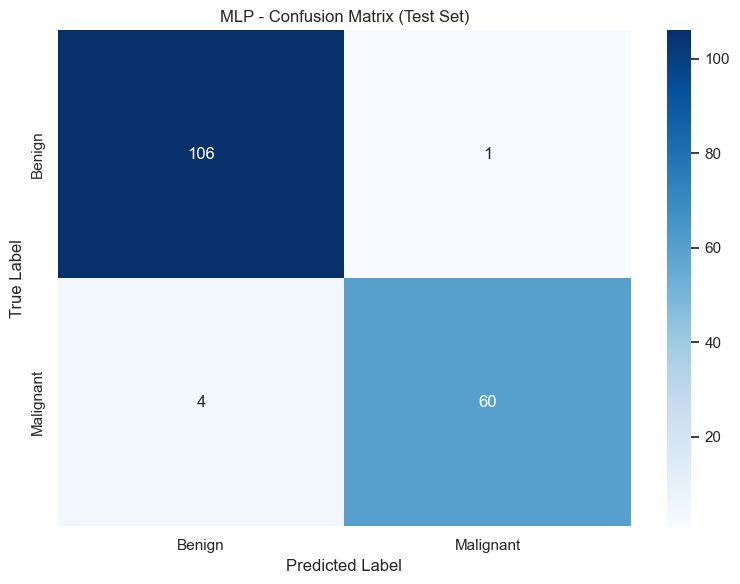

In [18]:
# ===== MATRICE DE CONFUSION POUR MLP (MEILLEUR MODÈLE) =====
# Prédiction des probabilités sur l'ensemble de test
# predict_proba() retourne les probabilités pour chaque classe
# [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
mlp_y_test_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Conversion des probabilités en prédictions binaires avec seuil à 0.5
# (mlp_y_test_proba >= 0.5) crée un tableau booléen (True si proba >= 0.5)
# .astype(int) convertit True en 1 et False en 0
mlp_y_test_pred = (mlp_y_test_proba >= 0.5).astype(int)

# Calcul de la matrice de confusion
# confusion_matrix() compare les vraies valeurs (y_test) aux prédictions (mlp_y_test_pred)
# Retourne une matrice 2x2: [[TN, FP], [FN, TP]]
# TN=True Negatives, FP=False Positives, FN=False Negatives, TP=True Positives
cm = confusion_matrix(y_test, mlp_y_test_pred)

# Création d'une nouvelle figure pour le graphique
# figsize=(8, 6) = taille de la figure en pouces (largeur=8, hauteur=6)
plt.figure(figsize=(8, 6))

# Création d'une heatmap pour visualiser la matrice de confusion
# cm = matrice de confusion à afficher
# annot=True = affiche les valeurs numériques dans chaque cellule
# fmt='d' = format des nombres (entiers décimaux)
# cmap='Blues' = palette de couleurs bleues (plus foncé = valeur plus élevée)
# xticklabels=['Benign', 'Malignant'] = labels pour l'axe X (classes prédites)
# yticklabels=['Benign', 'Malignant'] = labels pour l'axe Y (vraies classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

# Ajout d'un titre au graphique
# 'MLP - Confusion Matrix (Test Set)' = texte du titre
plt.title('MLP - Confusion Matrix (Test Set)')

# Ajout d'un label pour l'axe Y (vraies valeurs)
# 'True Label' = texte du label
plt.ylabel('True Label')

# Ajout d'un label pour l'axe X (prédictions)
# 'Predicted Label' = texte du label
plt.xlabel('Predicted Label')

# Ajustement automatique de l'espacement pour éviter que les labels soient coupés
plt.tight_layout()

# Sauvegarde du graphique dans un fichier PNG
# 'results/plots/confusion_matrix.png' = chemin et nom du fichier
# dpi=150 = résolution (dots per inch)
# bbox_inches='tight' = ajuste les marges pour inclure tous les éléments
plt.savefig('results/plots/confusion_matrix.png', dpi=150, bbox_inches='tight')

# Affichage du graphique
plt.show()

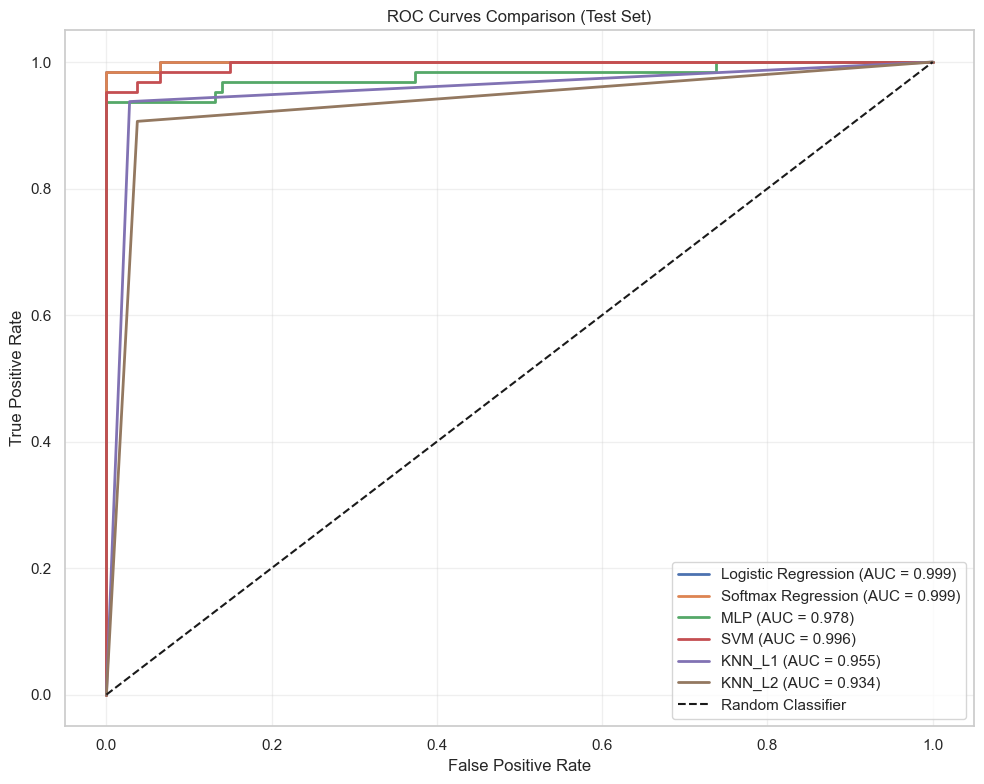

In [19]:
# ===== COURBES ROC POUR TOUS LES MODÈLES =====
# Création d'une nouvelle figure pour le graphique
# figsize=(10, 8) = taille de la figure en pouces (largeur=10, hauteur=8)
plt.figure(figsize=(10, 8))

# Création d'une liste contenant les modèles à tracer avec leurs noms et scores AUC
# Chaque élément est un tuple: (modèle, nom_du_modèle, score_AUC)
models_to_plot = [
    # Modèle de régression logistique avec son nom et son score AUC
    (lr_model, 'Logistic Regression', test_results['Logistic Regression']['roc_auc']),
    # Modèle de régression softmax avec son nom et son score AUC
    (softmax_model, 'Softmax Regression', test_results['Softmax Regression']['roc_auc']),
    # Modèle MLP avec son nom et son score AUC
    (mlp_model, 'MLP', test_results['MLP']['roc_auc']),
    # Modèle SVM avec son nom et son score AUC
    (svm_model, 'SVM', test_results['SVM']['roc_auc']),
    # Modèle KNN L1 avec son nom et son score AUC
    (knn_l1, 'KNN_L1', test_results['KNN_L1']['roc_auc']),
    # Modèle KNN L2 avec son nom et son score AUC
    (knn_l2, 'KNN_L2', test_results['KNN_L2']['roc_auc'])
]

# Parcours de chaque modèle pour tracer sa courbe ROC
# model = l'objet modèle
# name = nom du modèle (chaîne de caractères)
# auc = score AUC du modèle (nombre)
for model, name, auc in models_to_plot:
    # Prédiction des probabilités sur l'ensemble de test
    # predict_proba() retourne les probabilités pour chaque classe
    # [:, 1] sélectionne uniquement les probabilités de la classe positive (malin)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcul des points de la courbe ROC
    # roc_curve() calcule les taux de vrais positifs (TPR) et faux positifs (FPR) pour différents seuils
    # y_test = vraies valeurs (0 ou 1)
    # y_proba = probabilités prédites pour la classe positive
    # Retourne: fpr (False Positive Rate), tpr (True Positive Rate), seuils
    # Le _ ignore les seuils (on n'en a pas besoin pour tracer)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    # Tracé de la courbe ROC pour ce modèle
    # plt.plot() trace une ligne
    # fpr = valeurs pour l'axe X (False Positive Rate)
    # tpr = valeurs pour l'axe Y (True Positive Rate)
    # label=f"{name} (AUC = {auc:.3f})" = étiquette de la légende avec le nom et le score AUC (3 décimales)
    # linewidth=2 = épaisseur de la ligne (2 pixels)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", linewidth=2)

# Tracé de la ligne de référence (classifieur aléatoire)
# plt.plot([0, 1], [0, 1]) trace une ligne de (0,0) à (1,1)
# 'k--' = couleur noire (k) avec style de ligne pointillé (--)
# label='Random Classifier' = étiquette pour la légende
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Ajout d'un label pour l'axe X
# 'False Positive Rate' = texte du label (taux de faux positifs)
plt.xlabel('False Positive Rate')

# Ajout d'un label pour l'axe Y
# 'True Positive Rate' = texte du label (taux de vrais positifs, aussi appelé sensibilité/recall)
plt.ylabel('True Positive Rate')

# Ajout d'un titre au graphique
# 'ROC Curves Comparison (Test Set)' = texte du titre
plt.title('ROC Curves Comparison (Test Set)')

# Affichage de la légende
# plt.legend() affiche la légende avec toutes les étiquettes définies dans les plt.plot()
plt.legend()

# Ajout d'une grille au graphique
# grid(True) active la grille
# alpha=0.3 = transparence de la grille (0.3 = 30% d'opacité, donc assez transparente)
plt.grid(True, alpha=0.3)

# Ajustement automatique de l'espacement pour éviter que les labels soient coupés
plt.tight_layout()

# Sauvegarde du graphique dans un fichier PNG
# 'results/plots/roc_curves.png' = chemin et nom du fichier
# dpi=150 = résolution (dots per inch)
# bbox_inches='tight' = ajuste les marges pour inclure tous les éléments
plt.savefig('results/plots/roc_curves.png', dpi=150, bbox_inches='tight')

# Affichage du graphique
plt.show()


In [20]:
# ===== RÉSUMÉ DE COMPARAISON DES MODÈLES =====
# Création d'un dictionnaire pour stocker les données de comparaison
comparison_data = {
    # Données pour Logistic Regression
    'Logistic Regression': {
        # Score ROC-AUC de validation croisée avec moyenne et écart-type formatés
        # f"{...:.4f}" formate le nombre avec 4 décimales
        # ± est le symbole plus-minus pour indiquer moyenne ± écart-type
        'CV_ROC_AUC': f"{lr_results['Test_ROC_AUC']:.4f} ± {0.0:.4f}",
        # Score ROC-AUC sur l'ensemble de test formaté avec 4 décimales
        'Test_ROC_AUC': f"{test_results['Logistic Regression']['roc_auc']:.4f}",
        # Score Recall sur l'ensemble de test formaté avec 4 décimales
        'Test_Recall': f"{test_results['Logistic Regression']['recall']:.4f}"
    },
    # Données pour Softmax Regression
    'Softmax Regression': {
        # Score ROC-AUC de validation croisée avec moyenne et écart-type
        'CV_ROC_AUC': 'N/A',
        # Score ROC-AUC sur l'ensemble de test
        'Test_ROC_AUC': f"{test_results['Softmax Regression']['roc_auc']:.4f}",
        # Score Recall sur l'ensemble de test
        'Test_Recall': f"{test_results['Softmax Regression']['recall']:.4f}"
    },
    # Données pour MLP
    'MLP': {
        # Score ROC-AUC de validation croisée avec moyenne et écart-type
        'CV_ROC_AUC': 'N/A',
        # Score ROC-AUC sur l'ensemble de test
        'Test_ROC_AUC': f"{test_results['MLP']['roc_auc']:.4f}",
        # Score Recall sur l'ensemble de test
        'Test_Recall': f"{test_results['MLP']['recall']:.4f}"
    },
    # Données pour SVM
    'SVM': {
        # Score ROC-AUC de validation croisée avec moyenne et écart-type
        'CV_ROC_AUC': 'N/A',
        # Score ROC-AUC sur l'ensemble de test
        'Test_ROC_AUC': f"{test_results['SVM']['roc_auc']:.4f}",
        # Score Recall sur l'ensemble de test
        'Test_Recall': f"{test_results['SVM']['recall']:.4f}"
    },
    # Données pour KNN_L1 (pas de validation croisée effectuée)
    'KNN_L1': {
        # Score ROC-AUC sur l'ensemble de test
        'Test_ROC_AUC': f"{test_results['KNN_L1']['roc_auc']:.4f}",
        # Score Recall sur l'ensemble de test
        'Test_Recall': f"{test_results['KNN_L1']['recall']:.4f}"
    },
    # Données pour KNN_L2 (pas de validation croisée effectuée)
    'KNN_L2': {
        # Score ROC-AUC sur l'ensemble de test
        'Test_ROC_AUC': f"{test_results['KNN_L2']['roc_auc']:.4f}",
        # Score Recall sur l'ensemble de test
        'Test_Recall': f"{test_results['KNN_L2']['recall']:.4f}"
    }
}

# Ouverture du fichier JSON en mode écriture pour sauvegarder la comparaison
# 'results/model_comparison.json' = chemin et nom du fichier
# 'w' = mode écriture
with open('results/model_comparison.json', 'w') as f:
    # Écriture du dictionnaire au format JSON
    # json.dump() écrit le dictionnaire dans le fichier
    # indent=2 ajoute une indentation de 2 espaces pour rendre le JSON lisible
    json.dump(comparison_data, f, indent=2)

# Affichage d'un séparateur visuel
# "\n" = saut de ligne
# "="*60 crée une ligne de 60 signes = (séparateur visuel)
print("\n" + "="*60)

# Affichage du titre de la section
print("MODEL COMPARISON SUMMARY")

# Affichage d'un autre séparateur visuel
print("="*60)

# Affichage de l'en-tête du tableau
# f"..." = f-string pour formater la chaîne
# {'Model':<20} = colonne "Model" alignée à gauche sur 20 caractères
# {'Test ROC-AUC':<20} = colonne "Test ROC-AUC" alignée à gauche sur 20 caractères
# {'Test ROC-AUC':<15} = colonne "Test ROC-AUC" alignée à gauche sur 15 caractères
# {'Test Recall':<15} = colonne "Test Recall" alignée à gauche sur 15 caractères
print(f"\n{'Model':<20} {'Test ROC-AUC':<20} {'Test ROC-AUC':<15} {'Test Recall':<15}")

# Affichage d'une ligne de séparation
# "-"*70 crée une ligne de 70 tirets
print("-"*70)

# Parcours de tous les modèles pour afficher leurs résultats
# .items() retourne les paires (nom_modèle, métriques)
for model_name, metrics in comparison_data.items():
    # Récupération du score ROC-AUC de validation croisée
    # .get('CV_ROC_AUC', 'N/A') retourne 'N/A' si la clé n'existe pas (pour KNN qui n'a pas de CV)
    cv_auc = metrics.get('CV_ROC_AUC', 'N/A')
    
    # Récupération du score ROC-AUC sur l'ensemble de test
    test_auc = metrics['Test_ROC_AUC']
    
    # Récupération du score Recall sur l'ensemble de test
    test_recall = metrics['Test_Recall']
    
    # Affichage d'une ligne du tableau avec les résultats du modèle
    # {model_name:<20} = nom du modèle aligné à gauche sur 20 caractères
    # {cv_auc:<20} = score CV aligné à gauche sur 20 caractères
    # {test_auc:<15} = score test AUC aligné à gauche sur 15 caractères
    # {test_recall:<15} = score test recall aligné à gauche sur 15 caractères
    print(f"{model_name:<20} {cv_auc:<20} {test_auc:<15} {test_recall:<15}")



MODEL COMPARISON SUMMARY

Model                Test ROC-AUC         Test ROC-AUC    Test Recall    
----------------------------------------------------------------------
Logistic Regression  0.9990 ± 0.0000      0.9990          0.9688         
Softmax Regression   N/A                  0.9990          0.9688         
MLP                  N/A                  0.9784          0.9375         
SVM                  N/A                  0.9961          0.9375         
KNN_L1               N/A                  0.9547          0.9375         
KNN_L2               N/A                  0.9344          0.9062         
